In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
#For reading data from Yahoo
import yfinance as yf

sns.set_style('whitegrid')
#plt.style.use("fivethirtyeight")
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
# The tech stocks to be used
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#Download and store the data
data_dict = {}
for stock in tech_list:
    data_dict[stock] = yf.download(stock, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
#Organize dat separately by company
AAPL:pd.DataFrame = data_dict['AAPL']
GOOG:pd.DataFrame = data_dict['GOOG']
MSFT:pd.DataFrame = data_dict['MSFT']
AMZN:pd.DataFrame = data_dict['AMZN']

In [9]:
AAPL.reset_index().iloc[0,0]

Timestamp('2023-08-28 00:00:00')

In [6]:
#Verify data integrity
AAPL.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,180.089996,180.589996,178.550003,180.190002,179.272644,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,183.182632,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,186.694672,60813900
2023-08-31,187.839996,189.119995,187.479996,187.869995,186.913528,60794500
2023-09-01,189.490005,189.919998,188.279999,189.460007,188.495453,45732600
2023-09-05,188.279999,189.979996,187.610001,189.699997,188.734222,45280000
2023-09-06,188.399994,188.850006,181.470001,182.910004,181.978806,81755800
2023-09-07,175.179993,178.210007,173.539993,177.559998,176.656036,112488800
2023-09-08,178.350006,180.240005,177.789993,178.179993,177.272858,65551300


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-24 to 2024-08-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [16]:
#Check describe
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,189.442262,191.221032,187.847539,189.619762,189.078895,6.012538e+07
std,17.629197,17.900628,17.271089,17.627860,17.781916,2.493610e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.480003,177.442505,173.850002,175.677505,174.799145,4.637062e+07
50%,186.074997,187.100006,184.065002,186.055000,185.351654,5.368500e+07
75%,195.112495,196.410004,193.640003,194.687496,194.101444,6.595975e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


# Closing price

Provides information of the final price the stock is traded for at the end of a day.

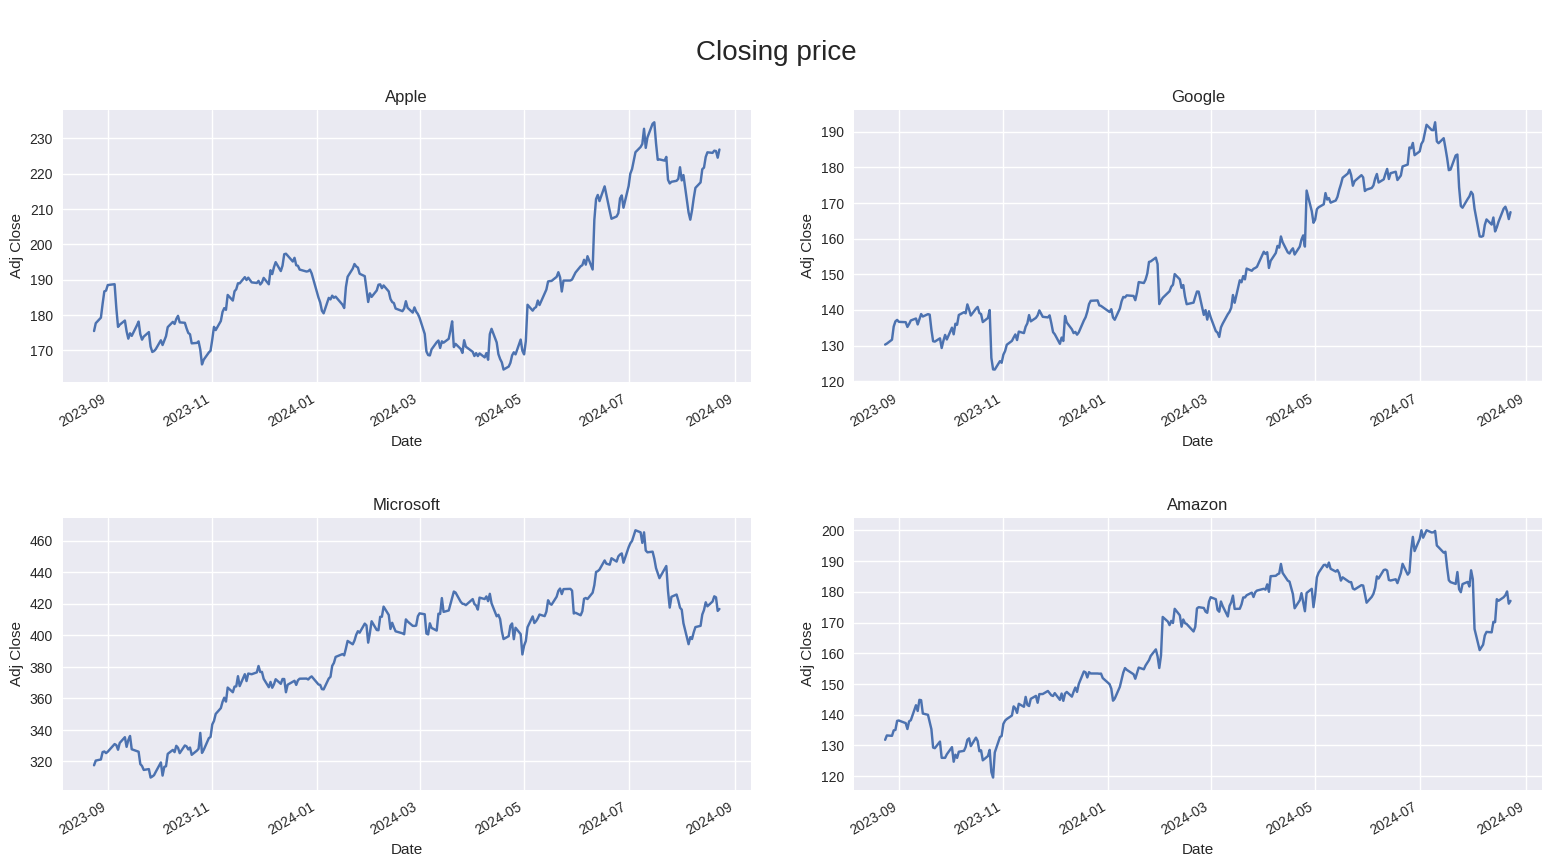

In [95]:


companyName = ['Apple', 'Google', 'Microsoft', 'Amazon']

plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.5, wspace=0.15)

for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    
    data_dict[company]['Adj Close'].plot()
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.title(companyName[i-1])
    
plt.suptitle('\nClosing price', fontsize=20)
plt.show()

# Volume of sales

We can check the amount of stocks each company trades a day, this value is often related with the stock's price.

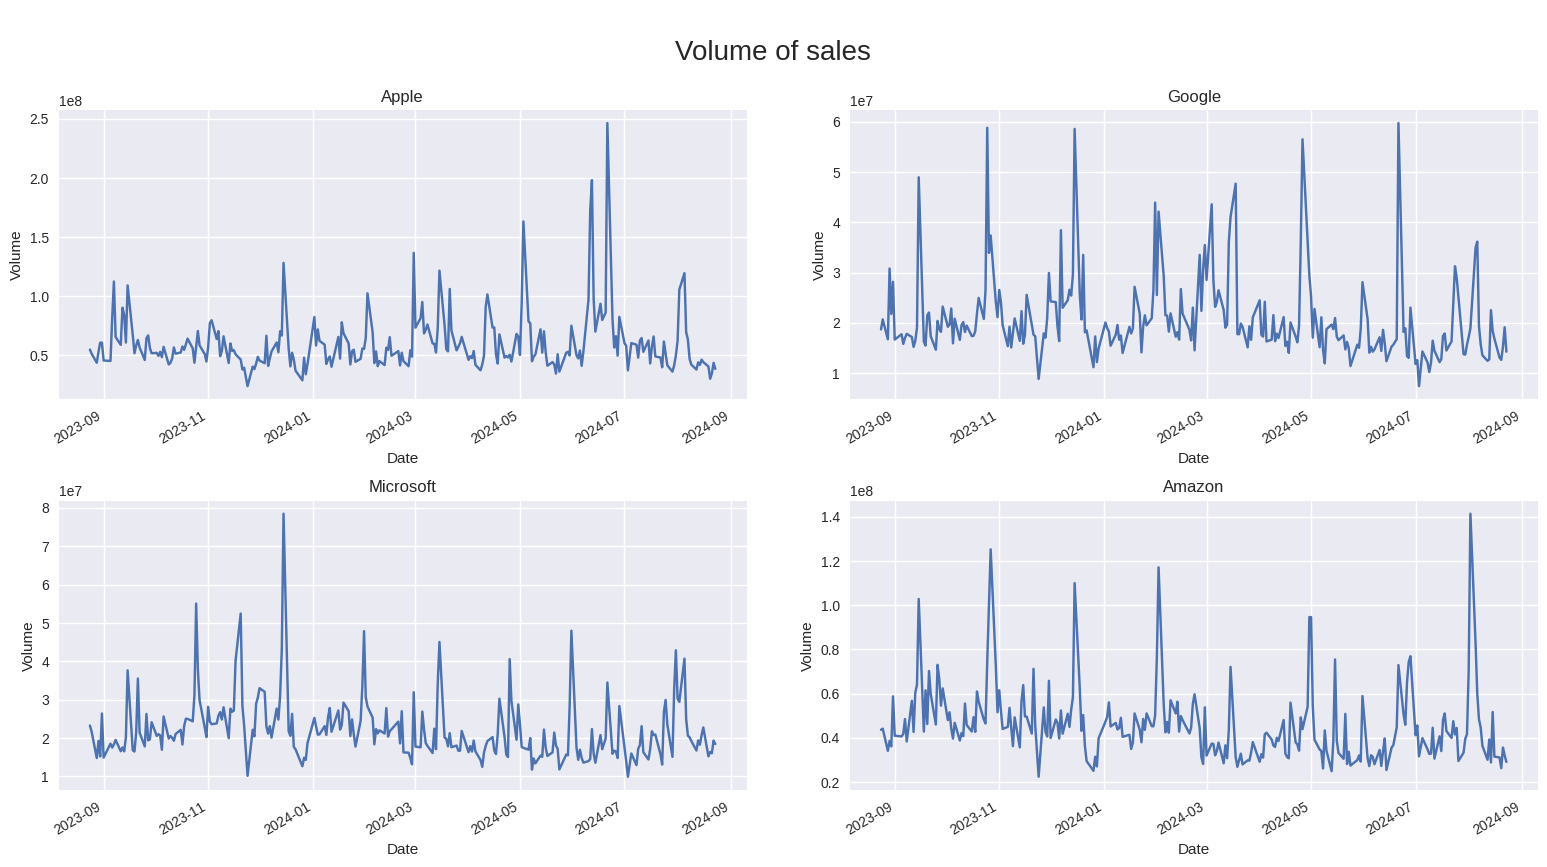

In [96]:
plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.35,wspace=0.15)

for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    
    data_dict[company]['Volume'].plot()
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(companyName[i-1])
    
plt.suptitle('\nVolume of sales', fontsize=20)
plt.show()


# Moving Average (MA)

Sometimes it is useful to visualize the moving average to smooth the peaks on the curve.
Let's consider the MA taking the mean value for 10, 20 and 30 days, this way we can evade some noise and detect some tendencies.

In [56]:
#Calculate the Moving Average for all companies

maDay = [10,20,30]

for company in tech_list:
    for ma in maDay:
        name = f'MA {ma} days'
        data_dict[company][name] = data_dict[company]['Adj Close'].rolling(ma).mean()


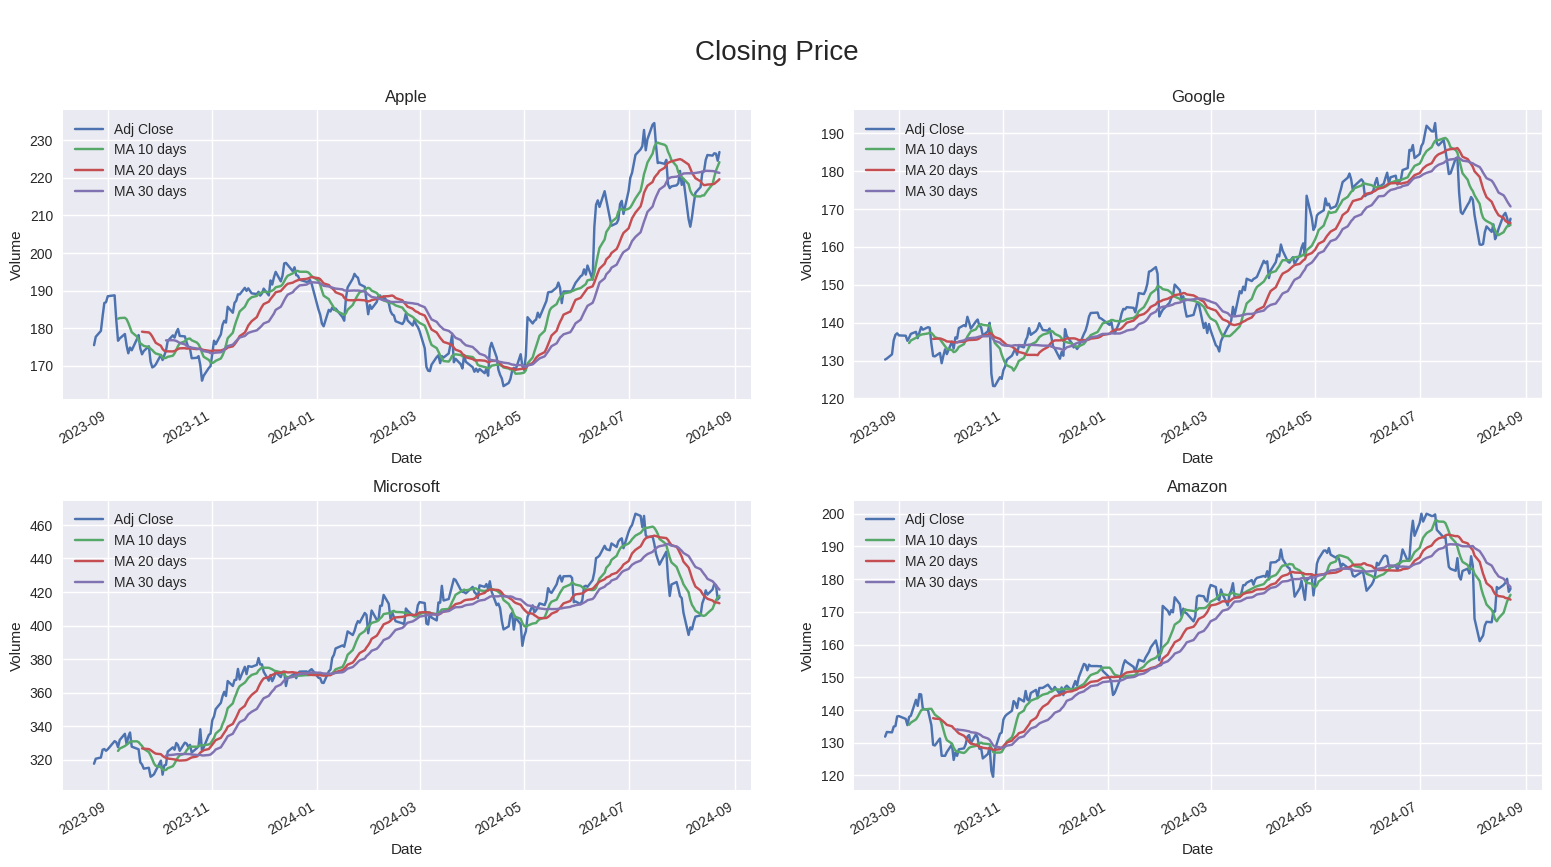

In [97]:
# plot the MA

plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.35,wspace=0.15)

for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    data_dict[company]['Adj Close'].plot()
    
    for j in maDay:
        data_dict[company][f'MA {j} days'].plot(label=f'MA {j} days')
    
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(companyName[i-1])
    plt.legend()
    
    
    
    
plt.suptitle('\nClosing Price', fontsize=20)
plt.show()

# Average return by the Stock per day



In [119]:
#Let's calculate the change percentaje

for company in tech_list:
    data_dict[company]['Daily return'] = data_dict[company]['Adj Close'].pct_change()

In [121]:
AAPL.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MA 10 days,MA 20 days,MA 30 days,Daily return,Daily return (%)
Date,,,,,,,,,,,
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100,215.026291,219.053539,221.511663,0.007130,0.712993
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300,215.298587,218.389613,221.670683,0.017193,1.719306
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600,215.288263,218.044844,221.727505,0.002034,0.203370
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000,215.949509,218.084804,221.841710,0.013531,1.353058
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200,216.593929,218.184771,221.840766,0.005918,0.591848
2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,218.280122,218.294217,221.785213,-0.000708,-0.070782
2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000,220.232082,218.382224,221.721692,0.002745,0.274468
2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500,221.914339,218.787858,221.511338,-0.000486,-0.048563
2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43695300,223.061000,219.152430,221.418774,-0.008260,-0.825970


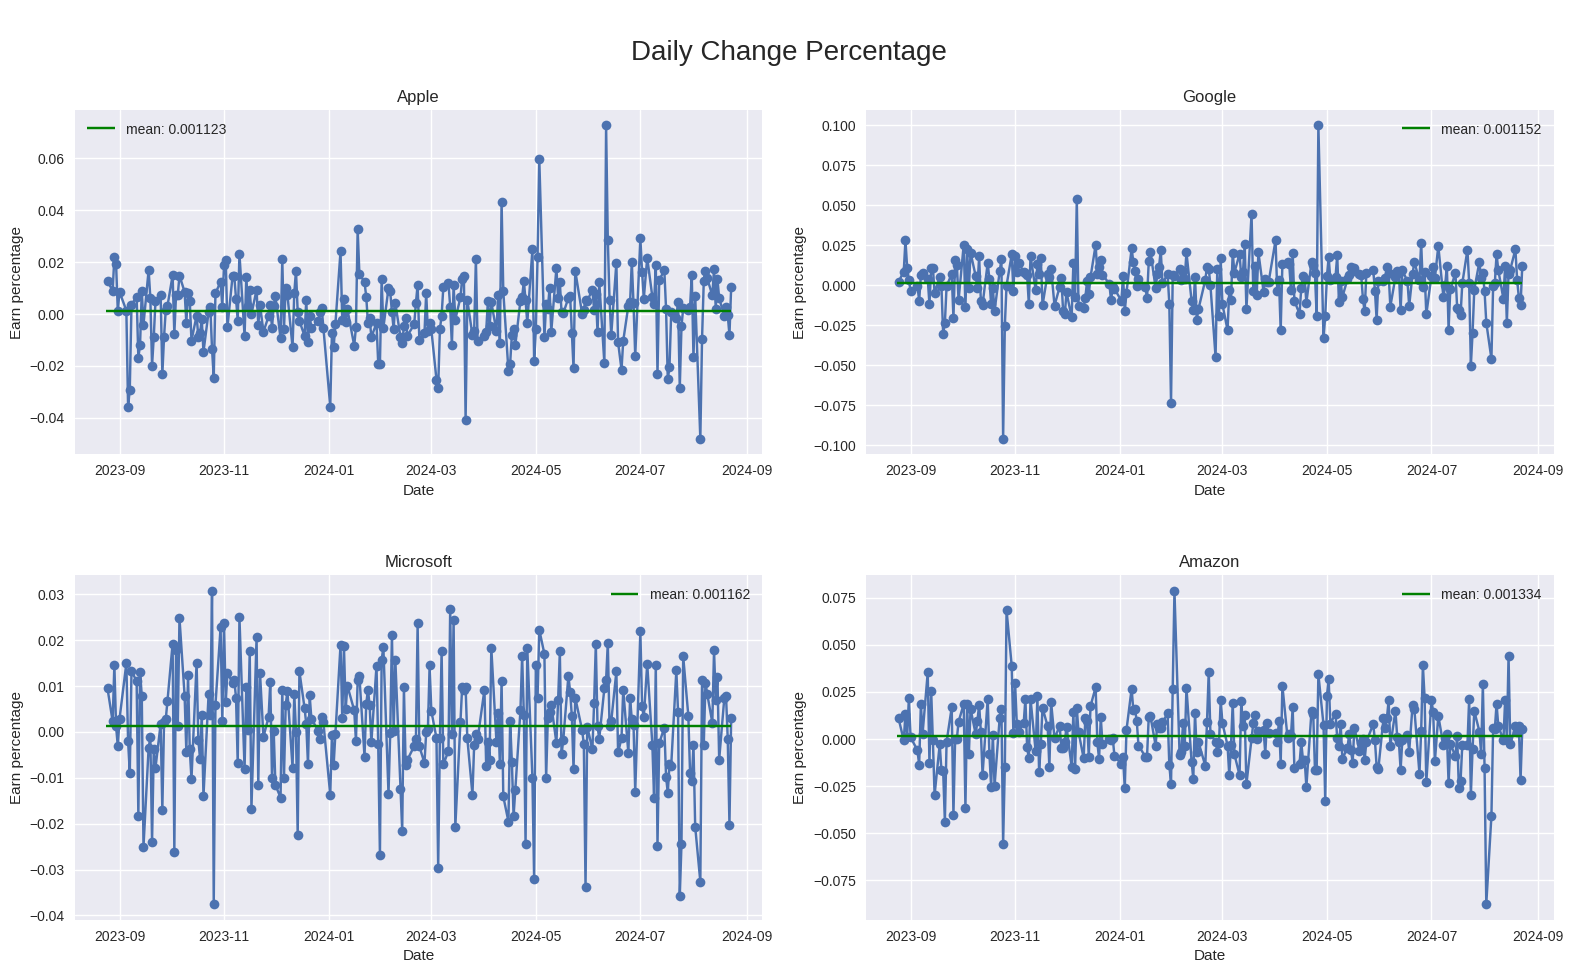

In [131]:

#Let's plot the dayly return 
plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.35, wspace=0.15)

for i,company in enumerate(tech_list,1):
    meanValue = data_dict[company]['Daily return'].mean()

    
    plt.subplot(2,2,i)
    
    
    plt.plot(data_dict[company]['Daily return'], linestyle='-', marker='o')
    plt.hlines(y=meanValue, xmin=data_dict[company].index.min(), xmax=data_dict[company].index.max(), colors='g', label=f'mean: {np.round(meanValue,6)}')
    
    plt.xlabel('Date')
    plt.ylabel('Earn percentage')
    plt.title(companyName[i-1])
    plt.legend()
    
plt.suptitle('\nDaily Change Percentage', fontsize=20)
plt.show()

A Better way to visualize the daily return is using a histogram, but this time we get to see what is the most probable daily earning

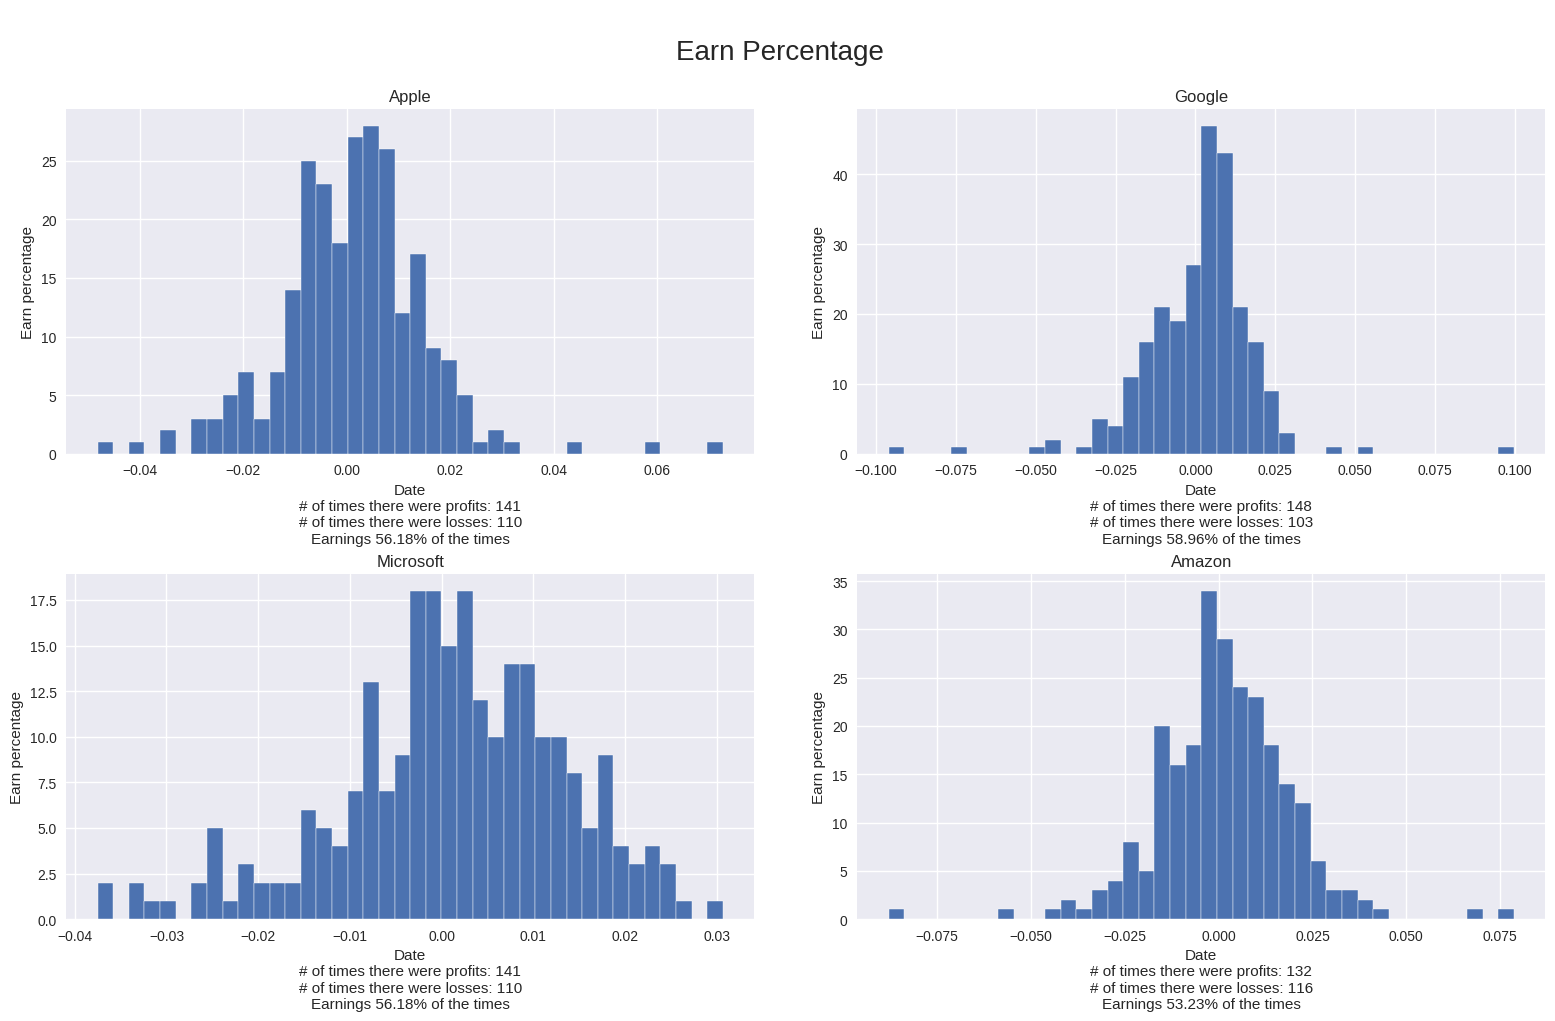

In [139]:
#Let's plot the dayly return 
plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.35, wspace=0.15)

for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    
    # Counting positive and negative values
    positive_count = (data_dict[company]['Daily return'] > 0).sum()  
    negative_count = (data_dict[company]['Daily return'] < 0).sum()  
    # Percentage of earnings
    EP=positive_count / (positive_count + negative_count) * 100
    
    data_dict[company]['Daily return'].hist(bins=40)

    plt.xlabel(f'Date\n# of times there were profits: {positive_count}\n# of times there were losses: {negative_count}\nEarnings {np.round(EP,2)}% of the times')
    plt.ylabel('Earn percentage')
    plt.title(companyName[i-1])
    
plt.suptitle('\nEarn Percentage', fontsize=20)
plt.show()

Now, we can ask ourselves if the closing stocks have some relation between them

In [140]:
closingPrice = {
    'AAPL': data_dict['AAPL']['Adj Close'],
    'GOOG': data_dict['GOOG']['Adj Close'],
    'MSFT': data_dict['MSFT']['Adj Close'],
    'AMZN': data_dict['AMZN']['Adj Close']
}

closingPrice_df = pd.DataFrame(closingPrice)
closingPrice_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-08-24,175.482040,130.271759,317.586182,131.839996
2023-08-25,177.700699,130.541458,320.573761,133.259995
2023-08-28,179.272659,131.640198,321.288361,133.139999
2023-08-29,183.182617,135.335999,325.963287,134.910004
2023-08-30,186.694672,136.774353,326.340485,135.070007


<Figure size 2000x1000 with 0 Axes>

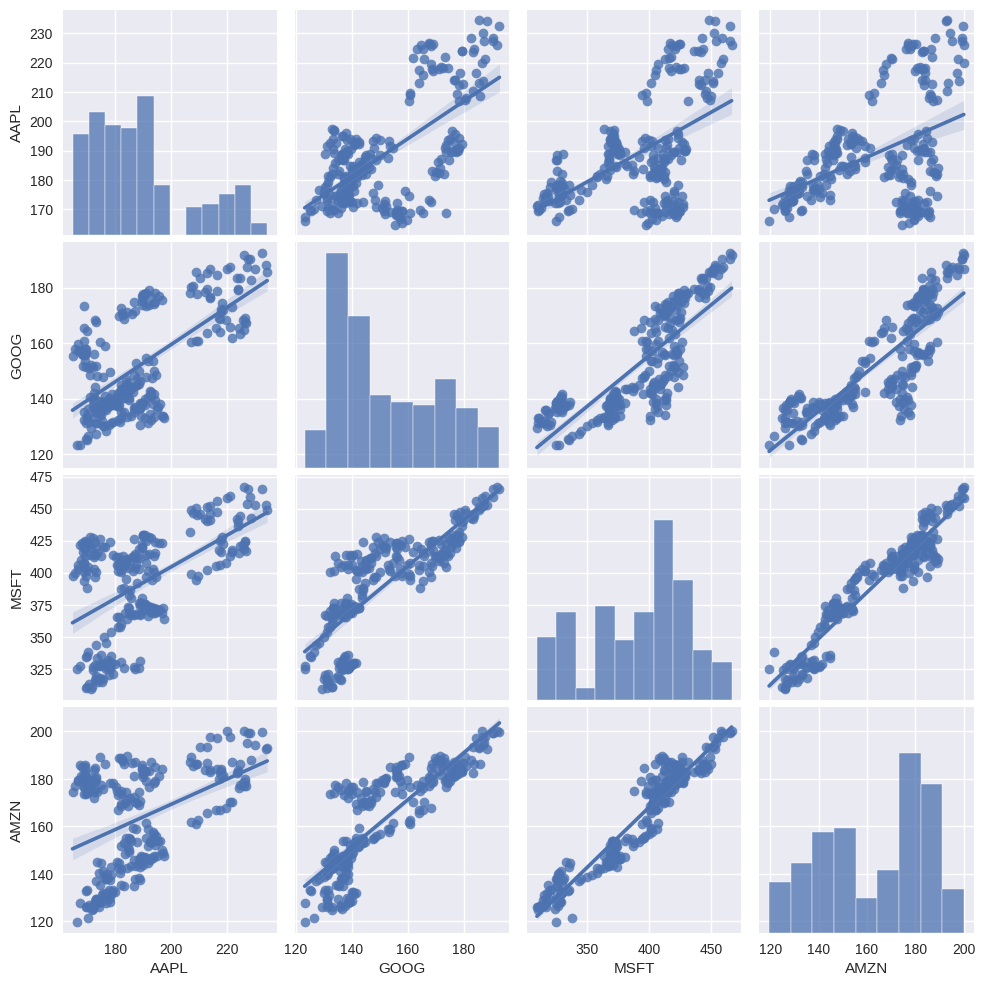

In [143]:
plt.figure(figsize=(20,10))
sns.pairplot(closingPrice_df, kind='reg')

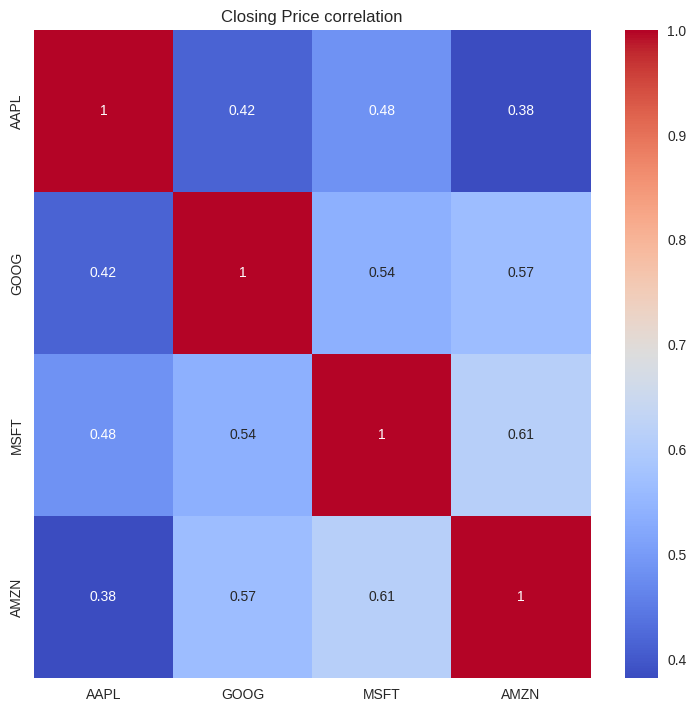

In [147]:
#Now we can check the correlation coefficient to get a quantitative value of their relation

plt.figure(figsize=(8,8))

sns.heatmap(closingPrice_df.pct_change().corr(), annot=True, cmap='coolwarm')
plt.title('Closing Price correlation')
plt.show()


None of the companies have a direct strong relation between 

# Risk when investing

A good way to measure the risk when investing in a specifiv stock, is to consider the percentage we displayed on one of the previous graphs
Where in the histogram, we showed the last year's historical amount of earnings, and for all companies in this analysis more than 50% percent of the times the companies present a profit.


Other basic approach of the investing risk, is to consider that the historical data of closing prices have a well defined standart deviation
from which we can infere, that the bigger the standart deviations is, the bigger the risk, because there exist bigger uncertainly of the possible result.

In [ ]:
# Risk when investing

